# Geospatial Visualizations

## Choropleth
A choropleth map is a good way to represent a statistical parameter that takes different values in different regions such as the administrative boundaries. In this notebook we show the distribution of the unemployment rates in the US and in Italy. We use two different libraries: plotly and matplotlib. Plotly allows dynamical interactions while matplotlib allows only simple non dynamic choropleth maps.

### Unemployment rate in the United States
We want to create a choropleth map of the unemployment rate in the US. We will use a GeoJson data for the polygons and another file that contains the unemplyment rates. The unemployment rate can be assigned to its polygon using the FIPS code of the county.  

In [1]:
import requests
import urllib.request as ur
import json
counties = json.load(ur.urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json'))

In [2]:
list(counties)

['type', 'features']

In [3]:
num_counties = len(counties['features'])
num_counties

3221

In [4]:
features = counties['features']
list(features[0])

['type', 'properties', 'geometry', 'id']

In [5]:
features[0]

{'type': 'Feature',
 'properties': {'GEO_ID': '0500000US01001',
  'STATE': '01',
  'COUNTY': '001',
  'NAME': 'Autauga',
  'LSAD': 'County',
  'CENSUSAREA': 594.436},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-86.496774, 32.344437],
    [-86.717897, 32.402814],
    [-86.814912, 32.340803],
    [-86.890581, 32.502974],
    [-86.917595, 32.664169],
    [-86.71339, 32.661732],
    [-86.714219, 32.705694],
    [-86.413116, 32.707386],
    [-86.411172, 32.409937],
    [-86.496774, 32.344437]]]},
 'id': '01001'}

In [6]:
fips = features[0]['id']
fips

'01001'

In [7]:
f0_coordinates = features[0]['geometry']['coordinates']
f0_coordinates

[[[-86.496774, 32.344437],
  [-86.717897, 32.402814],
  [-86.814912, 32.340803],
  [-86.890581, 32.502974],
  [-86.917595, 32.664169],
  [-86.71339, 32.661732],
  [-86.714219, 32.705694],
  [-86.413116, 32.707386],
  [-86.411172, 32.409937],
  [-86.496774, 32.344437]]]

In [8]:
import pandas as pd
unemp_rates = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv", dtype={"fips": str})
unemp_rates.head()

,fips,unemp
0,01001,5.3
1,01003,5.4
2,01005,8.6
3,01007,6.6
4,01009,5.5


We plot the counties' border from the JSON data that contains the polygons (i.e. 'counties'). The color of each county is determined from the 'unemp' column of the unemployment rate DataFrame (i.e. 'unemp_rates'). The 'locations' parameter in the choropleth() function is set to the field of the 'unemp_rates' DataFrame that contains the code used to identify the county in the JSON file by its 'id' field that in our case is 'fips'.

In [ ]:
import plotly.express as px

fig = px.choropleth(unemp_rates, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Unemployment rate in Italy
We want to plot a choropleth map for the unemployment rate in the provinces of Italy using Matplotlib, the Python core visualization package. We use two datasets. One dataset (Esri Shapefile) contains the polygons of the provinces, the other dataset contains the data about the unemployment rate. Both dataset are provided by [Istat](https://www.istat.it/), the Italian National Statistical Office. We select the unemployment rate 

In [10]:
unemployment_rate_it = pd.read_csv('https://raw.githubusercontent.com/luigiselmi/datascience/master/python/stats/data/italy/unemployment_rate_istat_province_cod_den_uts.csv')
unemployment_rate_it.head()

,Unnamed: 0,DEN_UTS,unemployment,COD_UTS
0,0,Imperia,11.130,8
1,1,Taranto,14.959,73
2,2,Cuneo,4.620,4
3,3,Rovigo,9.092,29
4,4,Savona,7.572,9


In [11]:
unemployment_rate_it['unemployment'].max()

23.909

We create a DataFrame from the Esri shapefile that contains the polygons of the provinces.

In [12]:
import geopandas as gpd
italy_df = gpd.read_file('data/vector/italy/istat_confini_provincie/ProvCM01012022_WGS84.shx')
italy_df['DEN_UTS'] 

0                     Torino
1                   Vercelli
2                     Novara
3                      Cuneo
4                       Asti
               ...          
102     Verbano-Cusio-Ossola
103    Monza e della Brianza
104                    Fermo
105    Barletta-Andria-Trani
106             Sud Sardegna
Name: DEN_UTS, Length: 107, dtype: object

We will use the field 'DEN_UTS' to merge the two datesets. Before the merge we have to be sure the name of a province is the same in both datasets. We can see that one is different and we have to change it in order to make it the same

In [13]:
row = italy_df[italy_df['COD_UTS'] == 108]
row
#list(row.index)[0]

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,SHAPE_AREA,Shape_Leng,geometry
103,1,3,108,0,108,Monza e della Brianza,-,Monza e della Brianza,MB,Provincia,4.054079e+08,164691.454327,"POLYGON ((519686.705 5065270.380, 519754.706 5..."


In [14]:
italy_df.iloc[103,7] = 'Monza Brianza'
italy_df.iloc[103,7]

'Monza Brianza'

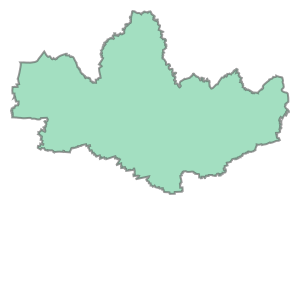

In [15]:
italy_df['geometry'][103]

After we have checked that all the names of the provinces are the same in both dataset we can proceed with the merge. We create a new DataFrame by adding the 'unemployment' column from the unemployment rate dataset to the  

In [16]:
merged_df = italy_df.merge(unemployment_rate_it, left_on=['DEN_UTS'], right_on=['DEN_UTS'])
merged_df.head()

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS_x,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,SHAPE_AREA,Shape_Leng,geometry,Unnamed: 0,unemployment,COD_UTS_y
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,6.826908e+09,593389.667001,"POLYGON ((411015.006 5049970.983, 411070.006 5...",49,8.256,1
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,2.081602e+09,458754.449021,"POLYGON ((437900.552 5088796.204, 437915.021 5...",66,8.231,2
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,1.340250e+09,276722.284585,"POLYGON ((459146.367 5079451.275, 459180.648 5...",67,7.676,3
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,6.894828e+09,542063.983810,"MULTIPOLYGON (((378928.552 4958539.163, 378934...",2,4.620,4
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,1.510170e+09,356521.052241,"POLYGON ((423634.299 4998152.373, 423642.986 4...",52,7.447,5


Finally we can plot a choropleth map using the merged DataFrame

(263342.40726, 1361952.9959399996, 3871586.3540399997, 5237711.07356)

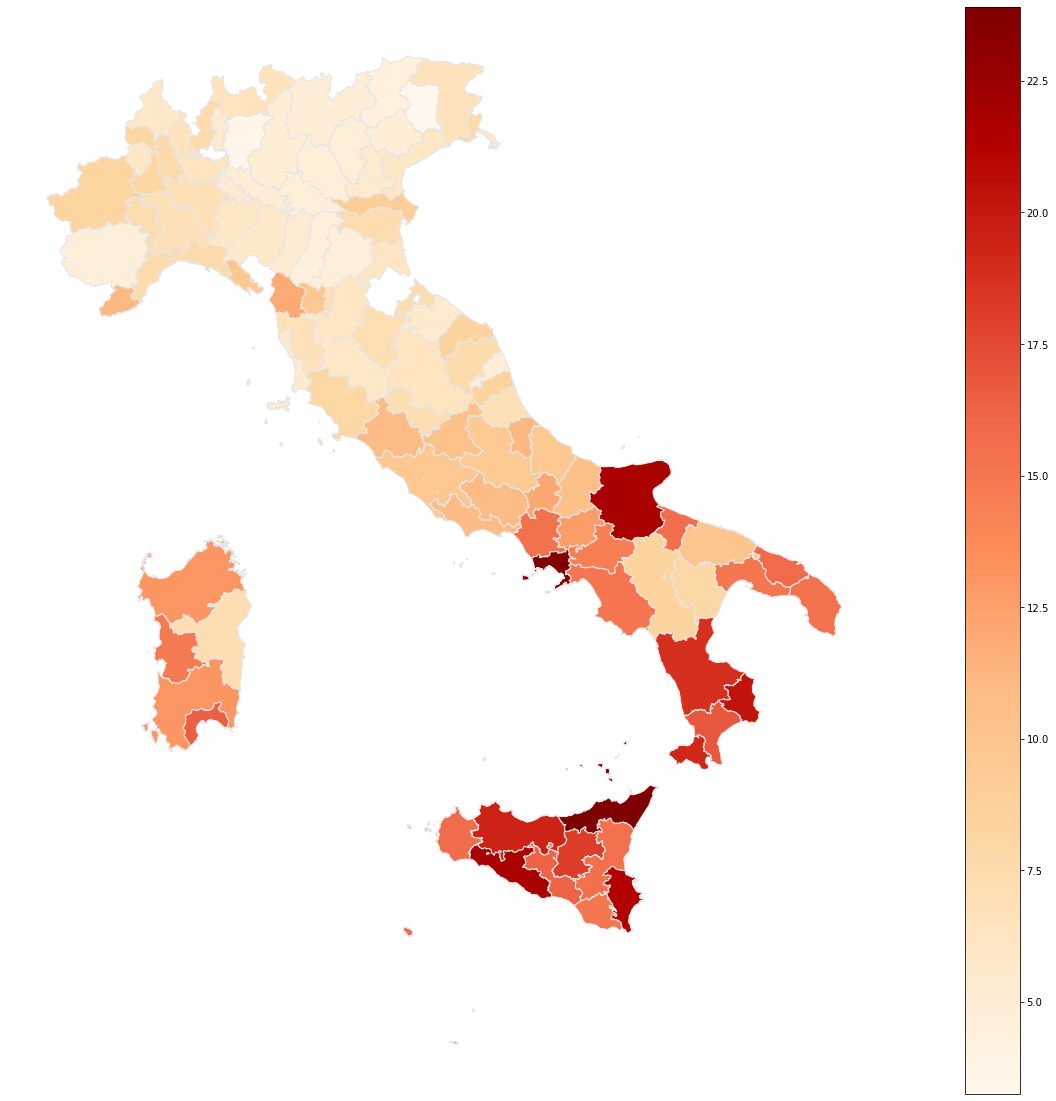

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(30,20))
merged_df.plot(column='unemployment', cmap='OrRd', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')

### Plotly Choropleth
We create a Plotly choropleth of the unemployment rate in Italy to enjoy its the dynamic features. The 1st step is to transform the DataFrame from the Esri shapefile into a JSON file.

In [57]:
italy_df.to_file('data/vector/italy/istat_confini_provincie/italy_provinces.json', driver = "GeoJSON")
with open('data/vector/italy/istat_confini_provincie/italy_provinces.json') as geofile:
    j_file = json.load(geofile)

In [58]:
features = j_file['features']
features[0]['properties']['DEN_UTS']

'Torino'

We have to add an 'id' field to the JSON features that will be used to link the polygongs to the values of the unemployment rates. We will use the COD_UTS field as ids. 

In [59]:
i = 0
for feature in j_file["features"]:
    feature ['id'] = features[i]['properties']['COD_UTS']
    i += 1

In [60]:
features[100]

{'type': 'Feature',
 'properties': {'COD_RIP': 4,
  'COD_REG': 18,
  'COD_PROV': 101,
  'COD_CM': 0,
  'COD_UTS': 101,
  'DEN_PROV': 'Crotone',
  'DEN_CM': '-',
  'DEN_UTS': 'Crotone',
  'SIGLA': 'KR',
  'TIPO_UTS': 'Provincia',
  'SHAPE_AREA': 1735652934.88,
  'Shape_Leng': 292644.668921},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[1193357.426, 4396609.993000001],
    [1193367.4611, 4396602.7062],
    [1193403.0570999999, 4396611.1951],
    [1193425.5706000002, 4396559.397399999],
    [1193483.3194000004, 4396525.4213],
    [1193525.8376000002, 4396492.9505],
    [1193559.8175, 4396475.0449],
    [1193610.3720000004, 4396435.5415],
    [1193639.1624999996, 4396419.810900001],
    [1193671.3032999998, 4396391.6899999995],
    [1193687.0380999995, 4396382.6521000005],
    [1193719.8036000002, 4396364.0338],
    [1193749.0979000004, 4396340.766799999],
    [1193779.8176999995, 4396315.0746],
    [1193815.3027999997, 4396293.4849],
    [1193964.6108, 4396210.139799999],
    [119

In [ ]:
fig = px.choropleth(unemployment_rate_it, geojson=j_file, locations='COD_UTS', color='unemployment',
                           color_continuous_scale="Viridis",
                           range_color=(0, 30),
                           scope="europe",
                           labels={'unemployment':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()